In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier,MLPRegressor
import seaborn as sns
Data = pd.read_csv("training1.csv", index_col = 0)
Data.replace(-999,0)
X1 = Data.drop(['Label','DER_lep_eta_centrality','PRI_jet_num','PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi','PRI_jet_subleading_pt','PRI_jet_subleading_eta','PRI_jet_subleading_phi'],axis=1)
y1 = Data["Label"]
y1 = pd.factorize(y1)[0]
Data['Catagories'] = y1


from sklearn.model_selection import train_test_split
y1 = Data['Catagories']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.20)
Data2 = pd.DataFrame(data = X_test)
Data1 = pd.DataFrame(data = X_train)
X_test = Data2.drop(['Weight'],axis = 1)
X_train = Data1.drop(['Weight'],axis = 1)
#X_train = X_train.drop(['Weight'],axis = 1)


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
Signal_Probability_Cutoff = 0.83
Background_Probability_Cutoff = 0.83
Target_labels = ['Signal','Background']

              precision    recall  f1-score   support

      Signal       0.77      0.71      0.74     17329
  Background       0.85      0.89      0.87     32671

   micro avg       0.82      0.82      0.82     50000
   macro avg       0.81      0.80      0.80     50000
weighted avg       0.82      0.82      0.82     50000

Training set score: 0.827550
Test set score: 0.824580
Learning rate = 0.001
Alpha 1e-05
Neuron Config 12
Solver was adam
The confusion Matrix is // [[12244  5085]
 [ 3686 28985]]


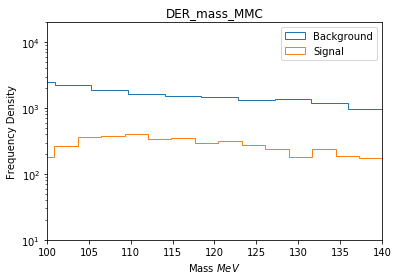

Sum of Signal Weight 5683.977368215001
Sum of Background Weight 76269.05859373101
Number of background Signals Defined 34070 \ Number of Higgs Signals Defined 15930
no cut 20.581553254550023
First cut, between 110 $MeV$ and 140 $MeV$  30.011114052888324
Cut on probabilities 2.3782185657564914


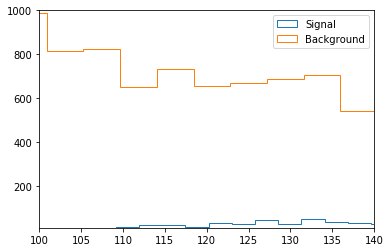

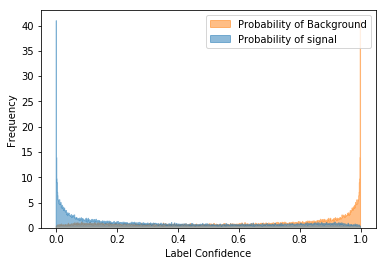

Sum of Signal Weights 326.330171455
Sum of Background Weights 4565.622078734999
Final Cut between 110 $MeV$ and 140 $MeV$ accepting only labels with confidence > 0.8 4.829556479024701


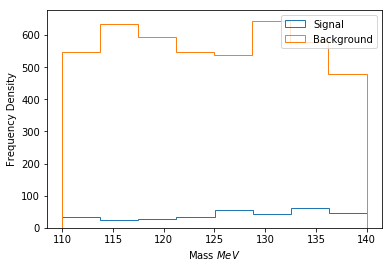

              precision    recall  f1-score   support

      Signal       0.76      0.71      0.74     17329
  Background       0.85      0.88      0.87     32671

   micro avg       0.82      0.82      0.82     50000
   macro avg       0.81      0.80      0.80     50000
weighted avg       0.82      0.82      0.82     50000

Training set score: 0.825325
Test set score: 0.822720
Learning rate = 0.001
Alpha 1e-05
Neuron Config 12
Solver was sgd
The confusion Matrix is // [[12325  5004]
 [ 3860 28811]]


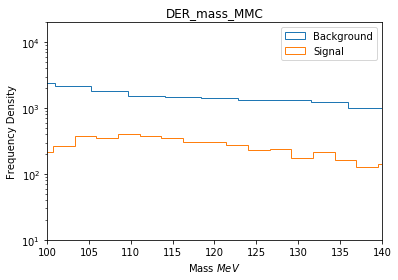

Sum of Signal Weight 6216.577328141
Sum of Background Weight 75736.458633805
Number of background Signals Defined 33815 \ Number of Higgs Signals Defined 16185
no cut 22.589095588410895
First cut, between 110 $MeV$ and 140 $MeV$  31.08636145299693
Cut on probabilities 2.178257392521553


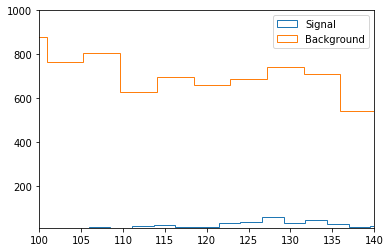

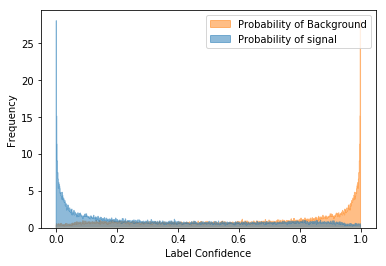

Sum of Signal Weights 318.624349503
Sum of Background Weights 4606.234514811999
Final Cut between 110 $MeV$ and 140 $MeV$ accepting only labels with confidence > 0.8 4.694679395881871


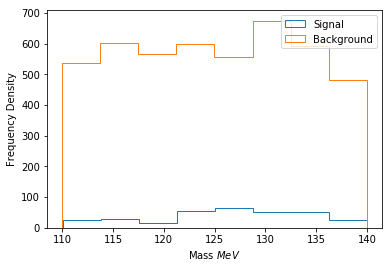

              precision    recall  f1-score   support

      Signal       0.79      0.72      0.75     17329
  Background       0.86      0.90      0.88     32671

   micro avg       0.84      0.84      0.84     50000
   macro avg       0.82      0.81      0.81     50000
weighted avg       0.83      0.84      0.83     50000

Training set score: 0.843675
Test set score: 0.835020
Learning rate = 0.001
Alpha 1e-05
Neuron Config (64, 128, 256)
Solver was adam
The confusion Matrix is // [[12430  4899]
 [ 3350 29321]]


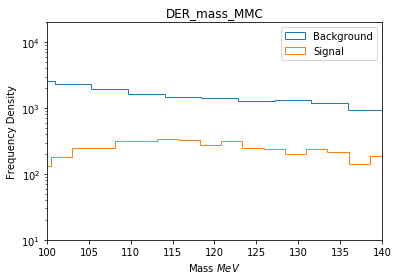

Sum of Signal Weight 5805.386894514
Sum of Background Weight 76147.649067432
Number of background Signals Defined 34220 \ Number of Higgs Signals Defined 15780
no cut 21.037925764627293
First cut, between 110 $MeV$ and 140 $MeV$  32.19927896553479
Cut on probabilities 3.995106664785836


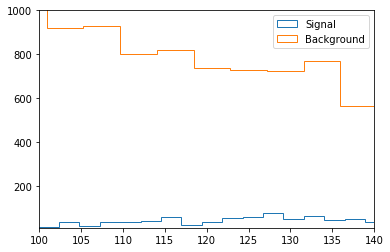

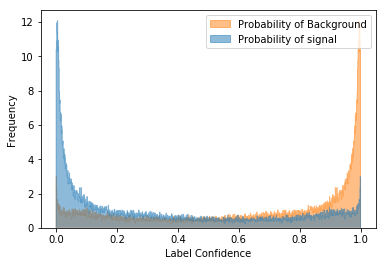

Sum of Signal Weights 610.952020766
Sum of Background Weights 5071.142184734001
Final Cut between 110 $MeV$ and 140 $MeV$ accepting only labels with confidence > 0.8 8.579346569837378


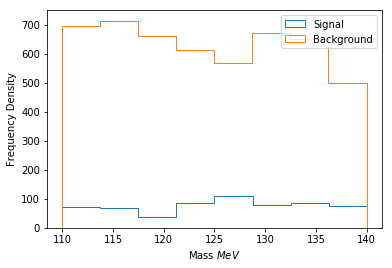

              precision    recall  f1-score   support

      Signal       0.78      0.72      0.75     17329
  Background       0.86      0.89      0.87     32671

   micro avg       0.83      0.83      0.83     50000
   macro avg       0.82      0.81      0.81     50000
weighted avg       0.83      0.83      0.83     50000

Training set score: 0.836210
Test set score: 0.831980
Learning rate = 0.001
Alpha 1e-05
Neuron Config (64, 128, 256)
Solver was sgd
The confusion Matrix is // [[12504  4825]
 [ 3576 29095]]


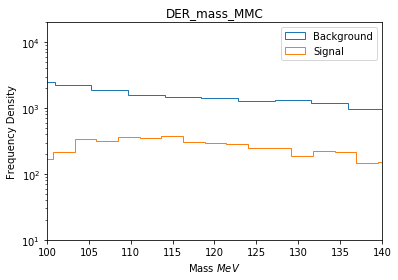

Sum of Signal Weight 5912.991582893
Sum of Background Weight 76040.044379053
Number of background Signals Defined 33920 \ Number of Higgs Signals Defined 16080
no cut 21.443026384040095
First cut, between 110 $MeV$ and 140 $MeV$  32.303327429165094
Cut on probabilities 3.7677605948051784


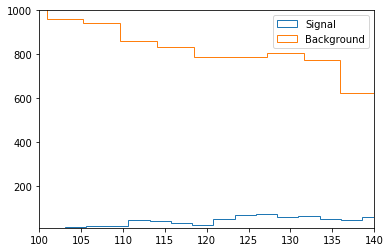

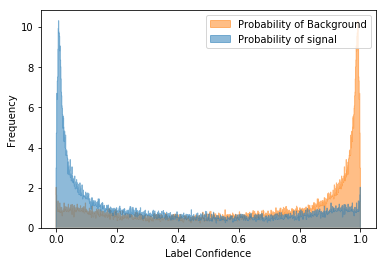

Sum of Signal Weights 591.790173633
Sum of Background Weights 5385.653893692
Final Cut between 110 $MeV$ and 140 $MeV$ accepting only labels with confidence > 0.8 8.063963057483548


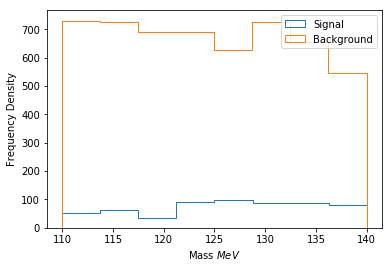

In [ ]:
from sklearn.neural_network import MLPClassifier,MLPRegressor

Target_labels = ['Signal','Background']

for lr in [1e-3]:
    
    for alpha in [1e-5, 1e-3,0.1]:
        
        for networkConfig in [(12),(64,128,256),(32,64,128)]:
            
            for solver in ['adam','sgd']:
        
                mlp = MLPClassifier(hidden_layer_sizes=networkConfig,max_iter = 1000,activation = 'relu',solver = solver,alpha = alpha ,early_stopping= True, learning_rate_init = lr)
                model = mlp.fit(X_train, y_train)
                predictions = mlp.predict(X_test)
                Prob_Predictions = mlp.predict_proba(X_test)
                
                Prob_Signal = []
                Prob_Background = []
                for i,array in enumerate(Prob_Predictions):
                    Prob_Signal.append(Prob_Predictions[i,0])
                    Prob_Background.append(Prob_Predictions[i,1])
                    
                Data2['Signal_Probability'] = Prob_Signal
                Data2['Background_Probability'] = Prob_Background


                print(classification_report(y_test,predictions,target_names=Target_labels))
                print("Training set score: %f" % mlp.score(X_train, y_train))
                print("Test set score: %f" % mlp.score(X_test, y_test))
                print('Learning rate =' ,lr)
                print('Alpha' ,alpha)
                print('Neuron Config' ,networkConfig)
                print('Solver was', solver)
                print('The confusion Matrix is //', confusion_matrix(y_test,predictions))
                Data2['Catagory'] = predictions
                Test_Signal = Data2['Catagory'] == 0
                Test_Background = Data2['Catagory'] == 1
                Test_Signal2 = Data2[Test_Signal]
                Test_Background2 = Data2[Test_Background]
                Test_Signal_Weight = Test_Signal2['Weight']
                Test_Background_Weight = Test_Background2['Weight']
                Test_Sum_Signal = Test_Signal_Weight.sum()
                Test_Sum_Background = Test_Background_Weight.sum()
                u = Test_Background2['DER_mass_MMC']
                #u2 = Test_Background2['DER_mass_vis']
                v = Test_Signal2['DER_mass_MMC'] 
                #v2 = Test_Signal2['DER_mass_vis'] 
                num_bins = 500
                n,bins,patches = plt.hist(u,num_bins,histtype = 'step',weights = Test_Background_Weight, log = True, label = ('Background')  )
                n,bins,patches = plt.hist(v,num_bins,histtype = 'step',weights = Test_Signal_Weight, log = True, label = ('Signal'))
                plt.ylabel('Frequency Density')
                plt.xlabel('Mass $MeV$')
                plt.title('DER_mass_MMC')
                plt.axis([100,140,10,20000])
                plt.legend()
                plt.show(block=False)
                
                
                number_of_background =len(Test_Background2)
                number_of_signals = len(Test_Signal2)
                print('Sum of Signal Weight',Test_Sum_Signal,)
                print('Sum of Background Weight',Test_Sum_Background)
                print('Number of background Signals Defined',number_of_background,'\\ Number of Higgs Signals Defined',number_of_signals,)
                sqrt = Test_Sum_Signal/(Test_Sum_Background)**0.5
                print('no cut',sqrt,)
                
                
            
                L = Test_Signal2['DER_mass_MMC'].between (110,140, inclusive = True)
                L2 = (Test_Signal2['Signal_Probability'] >= Signal_Probability_Cutoff)
                O = Test_Background2['DER_mass_MMC'].between(110,140,inclusive = True)
                O2 = (Test_Background2['Background_Probability']>= Background_Probability_Cutoff)
                D = Test_Signal2[L]
                D2 = Test_Signal2[L2]
                F = Test_Background2[O]
                F2 =Test_Background2[O2]
                delta = D['Weight'].sum()
                pi = F['Weight'].sum()
                print('First cut, between 110 $MeV$ and 140 $MeV$ ', delta/(pi**0.5),)
                sigma = (D2['Weight'].sum())/((F2['Weight'].sum())**0.5)
                print('Cut on probabilities',sigma,)
                               
                n,bins,patches = plt.hist(D2['DER_mass_MMC'],500,histtype = 'step', label = ('Signal'), weights = D2['Weight'])
                n,bins,patches = plt.hist(F2['DER_mass_MMC'],500,histtype = 'step', label = ('Background'),weights = F2['Weight'])
                plt.axis([100,140,10,1000])
                plt.legend()
                plt.show(block=False)
                
                n,bins,patches = plt.hist(Prob_Predictions,1000,histtype = 'step', label = ('Probability of signal', 'Probability of Background'), density = 1, fill = 'green', alpha = 0.5)
                plt.legend()
                plt.ylabel('Frequency')
                plt.xlabel('Label Confidence')
                plt.show(block=False)
                #plt.axis([100,140,10,20000])
                
                
                Prob_Cut_Signal = (D['Signal_Probability'] >= Signal_Probability_Cutoff)
                Prob_Cut_Background = (F['Background_Probability'] >= Background_Probability_Cutoff)
                
                Prob_Cut_Signal2 = D[Prob_Cut_Signal]
                Prob_Cut_Background2 = F[Prob_Cut_Background]
                
                beta = Prob_Cut_Signal2['Weight'].sum()
                gamma = Prob_Cut_Background2['Weight'].sum()
                print('Sum of Signal Weights', beta,)
                print('Sum of Background Weights',gamma,)
                sqrt2 = beta/gamma**0.5
                print('Final Cut between 110 $MeV$ and 140 $MeV$ accepting only labels with confidence > 0.8',sqrt2,)
                
                n,bins,patches = plt.hist(Prob_Cut_Signal2['DER_mass_MMC'],8,histtype = 'step', label = ('Signal'), weights = Prob_Cut_Signal2['Weight'])
                n,bins,patches = plt.hist(Prob_Cut_Background2['DER_mass_MMC'],8,histtype = 'step', label = ('Background'),weights = Prob_Cut_Background2['Weight'])
                #plt.axis([100,140,10,30])
                plt.ylabel('Frequency Density')
                plt.xlabel('Mass $MeV$')
                plt.legend()
                plt.show(block=False)
                